Introduction to APRIORI

Apriori is an algorithm used for Association Rule Mining. It searches for a series of frequent sets of items in the datasets. It builds on associations and correlations between the itemsets. It is the algorithm behind “You may also like” where you commonly saw in recommendation platforms.
What is Associate Rule Mining?

ARM( Associate Rule Mining) is one of the important techniques in data science. In ARM, the frequency of patterns and associations in the dataset is identified among the item sets then used to predict the next relevant item in the set. This ARM technique is mostly used in business decisions according to customer purchases.

Example: In Walmart, if Ashok buys Milk and Bread, the chances of him buying Butter are predicted by the Associate Rule Mining technique.

Some definitions need to be remembered

Before we start, go through some terms which are explained below.

SUPPORT_COUNT — number of transactions in which the itemset appears.

MINIMUM_SUPPORT_COUNT — the minimum frequency of itemset in the dataset.

CANDIDATE_SET — C(k) support_count of each item in the dataset.

ITEM_SET — L(k) comparing each item in the candidate_set support count to minimum_support_count and filtering the under frequent itemset.

SUPPORT — the percentage of transactions in the database follow the rule.

Support(A->B) = Support_count(A U B)

CONFIDENCE — the percentage of customers who bought A also bought B.

Confidence(A->B) = [Support_count(AUB)/Support_count(A)]*100

Steps In Apriori

Apriori algorithm is a sequence of steps to be followed to find the most frequent itemset in the given database. This data mining technique follows the join and the prune steps iteratively until the most frequent itemset is achieved. A minimum support threshold is given in the problem or it is assumed by the user.

#1) In the first iteration of the algorithm, each item is taken as a 1-itemsets candidate. The algorithm will count the occurrences of each item.

#2) Let there be some minimum support, min_sup ( eg 2). The set of 1 – itemsets whose occurrence is satisfying the min sup are determined. Only those candidates which count more than or equal to min_sup, are taken ahead for the next iteration and the others are pruned.

#3) Next, 2-itemset frequent items with min_sup are discovered. For this in the join step, the 2-itemset is generated by forming a group of 2 by combining items with itself.

#4) The 2-itemset candidates are pruned using min-sup threshold value. Now the table will have 2 –itemsets with min-sup only.

#5) The next iteration will form 3 –itemsets using join and prune step. This iteration will follow antimonotone property where the subsets of 3-itemsets, that is the 2 –itemset subsets of each group fall in min_sup. If all 2-itemset subsets are frequent then the superset will be frequent otherwise it is pruned.

#6) Next step will follow making 4-itemset by joining 3-itemset with itself and pruning if its subset does not meet the min_sup criteria. The algorithm is stopped when the most frequent itemset is achieved.

                                Apriori Algorithm Flowchart:


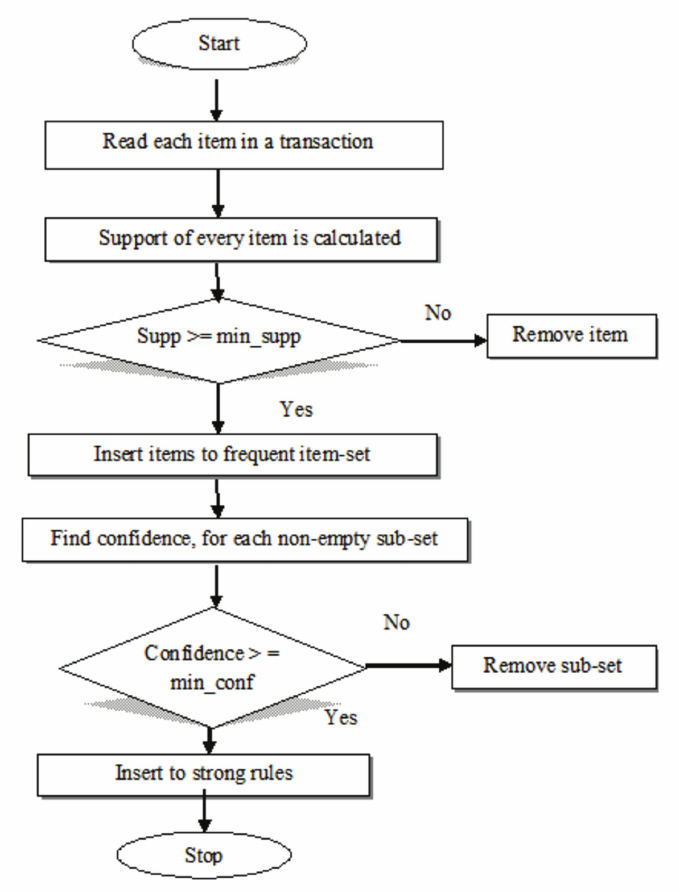

Example:
This is our dataset in which we are going to work
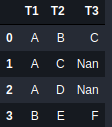

1. Taking each items and counting thieir occurence in Itemset
2. Removing Items with frequency less than minimum support count


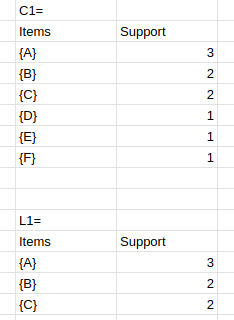

3. Making pair of items and finding no of occurence of pair in main transaction
4. Removing the pair of items with frequency less than minimum support count


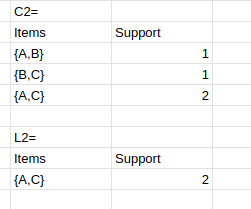

Python Implementation

> Import Required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/data.csv


Prepare the data

In [2]:
import pandas as pd
import itertools

In [3]:
data = pd.read_csv('/kaggle/input/data.csv')

In [4]:
rowlength = len(data)
no_features = len(data.values[0])

In [5]:
data.head()

,T1,T2,T3
0,A,B,C
1,A,C,Nan
2,A,D,Nan
3,B,E,F


In [6]:
print(rowlength, no_features)

4 3


In [7]:
minimum_support_count = 2

records = []
for i in range(0, rowlength):
    records.append([str(data.values[i,j]) for j in range(0, no_features)])
items = sorted([item for sublist in records for item in sublist if item != 'Nan'])

Step — 1

In stage1, the candidate_set C1 is generated by measuring the support_count of each item in the dataset. Item_set L1 is generated by comparing C1 support_count with minimum_support_count. Here k=1.

In [8]:
def stage_1(items, minimum_support_count):
    c1 = {i:items.count(i) for i in items}
    l1= {}
    
    for key, value in c1.items():
        if(value >= minimum_support_count):
            l1[key] = value
    return c1, l1
c1, l1 = stage_1(items, minimum_support_count)

1. Taking each items and counting thieir occurence in Itemset

In [9]:
c1

{'A': 3, 'B': 2, 'C': 2, 'D': 1, 'E': 1, 'F': 1}

2. Removing Items with frequency less than minimum support count

In [10]:
l1

{'A': 3, 'B': 2, 'C': 2}

Step — 2

In this stage, candidate_set C2 is generated using Item_set L1 from the previous step. Check all subsets in itemset are frequent if not, remove respective itemset from the list. Item_set L2 is generated by comparing candidate_set C2 with minimum_support_count. Here k=2.

In [11]:
def sublist(lst1,lst2):
    return(set(lst1) <= set(lst2))

To check subsets of an itemset are frequent, we should pass current stage itemset, the previous stage itemset, in this case, L1, and k-1.

In [12]:
def check_subset_frequency(itemset, l, n):
    if(n>1):
        subsets = list(itertools.combinations(itemset,n))
    else:
        subsets = itemset
    for iter1 in subsets:
        if not iter1 in l:
            return False
    return True

In [13]:
def stage_2(l1, records, minimum_support_count):
    l1 = sorted(list(l1.keys()))
    l1 = list(itertools.combinations(l1,2))
    c2 = {}
    l2 = {}
    for iter1 in l1:
        count = 0
        for iter2 in records:
            if(sublist(iter1,iter2)):
                count += 1
        c2[iter1] = count
    for key,value in c2.items():
        if(value >= minimum_support_count):
            if(check_subset_frequency(key, l1,2)):
                l2[key] = value
    return c2, l2

c2,l2 = stage_2(l1, records, minimum_support_count)

3. Making pair of items and finding no of occurence of pair in main transaction

In [14]:
c2

{('A', 'B'): 1, ('A', 'C'): 2, ('B', 'C'): 1}

4. Removing the pair of items with frequency less than minimum support count

In [15]:
l2

{('A', 'C'): 2}